In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import dates
from datetime import datetime
import sklearn
import seaborn as sns

In [5]:
walmart_data = pd.read_csv('Walmart1.csv')

In [6]:
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [7]:
# Convert date to datetime format 
walmart_data['Date'] =  pd.to_datetime(walmart_data['Date'])
walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\User\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify in

In [8]:
#checking missing values
walmart_data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
#Splitting date column into day, month and year :


In [10]:
walmart_data["Day"]= pd.DatetimeIndex(walmart_data['Date']).day
walmart_data['Month'] = pd.DatetimeIndex(walmart_data['Date']).month
walmart_data['Year'] = pd.DatetimeIndex(walmart_data['Date']).year
walmart_data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


<AxesSubplot:title={'center':'Total sales for each store'}, xlabel='Store', ylabel='Total Sales'>

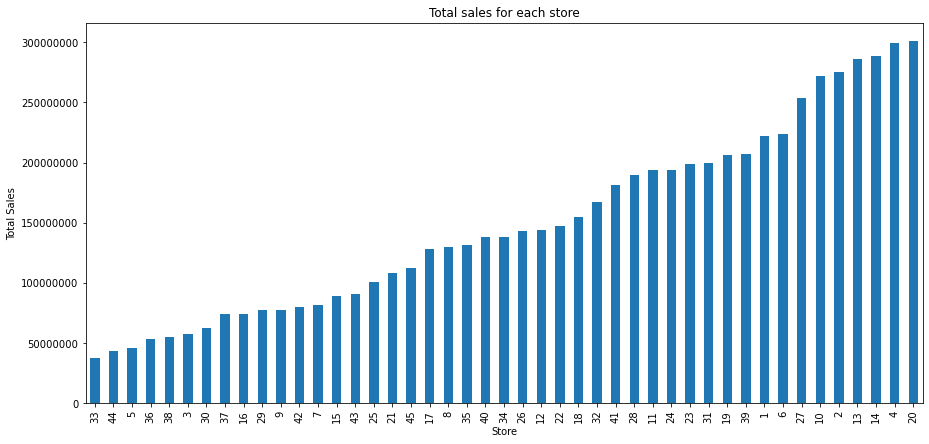

In [11]:
# 1) Which store has maximum sales ?
total_sales= walmart_data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_array = np.array(total_sales)
plt.figure(figsize=(15,7))
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales')
total_sales.plot(kind='bar')

In [12]:
#2) Which store has maximum standard deviation? 
#i.e. the sales vary a lot. Also, find out the coefficient of mean to standard deviation.
walmart_data_std = pd.DataFrame(walmart_data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
walmart_data_std.head(1).index[0] , walmart_data_std.head(1).Weekly_Sales[walmart_data_std.head(1).index[0]]

(14, 317569.9494755081)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


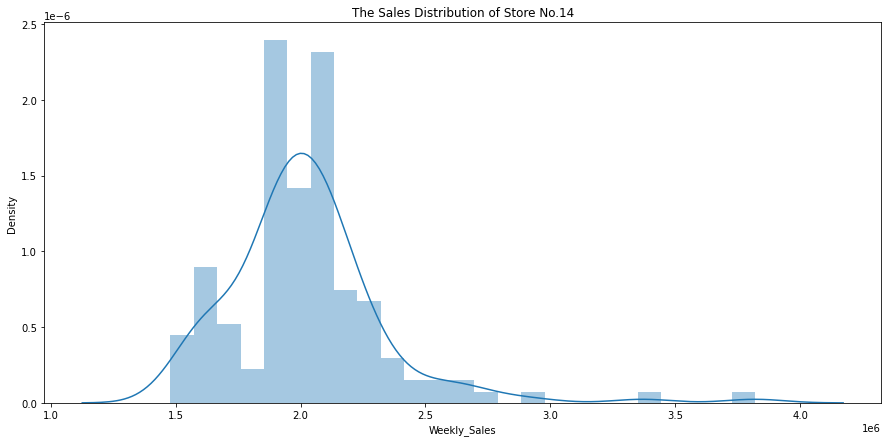

In [13]:
# Extracting the sales data for store number 14 and plotting its distribution
plt.figure(figsize=(15,7))
sns.distplot(walmart_data[walmart_data['Store'] == walmart_data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+ str(walmart_data_std.head(1).index[0]))
import warnings
warnings.filterwarnings('ignore')

In [14]:
#Calculating the coefficient of mean to standard deviation
coef = pd.DataFrame(walmart_data.groupby('Store')['Weekly_Sales'].std() / walmart_data.groupby('Store')['Weekly_Sales'].mean())
coef = coef.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_max = coef.sort_values(by='Coefficient of mean to standard deviation',ascending=False)
coef_max.head(7)

,Coefficient of mean to standard deviation
Store,
35,0.229681
7,0.197305
15,0.193384
29,0.183742
23,0.179721
21,0.170292
45,0.165613


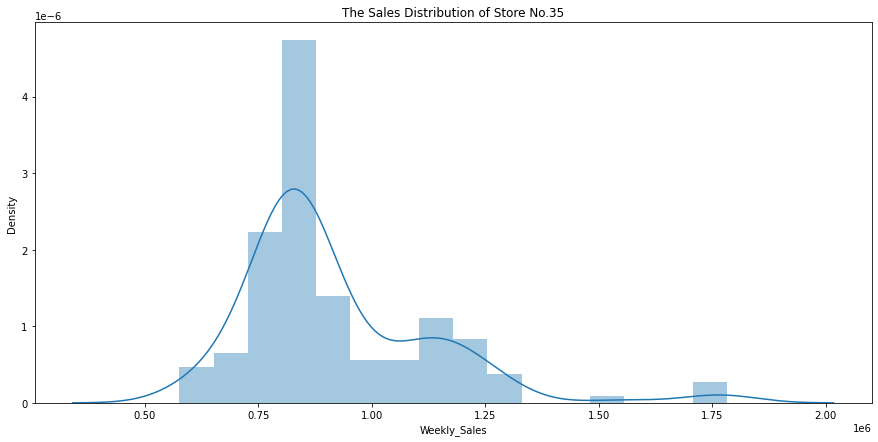

In [15]:
# Distribution of store 35 has maximum coefficient of mean to standard deviation
plt.figure(figsize=(15,7))
sns.distplot(walmart_data[walmart_data['Store'] == coef_max.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store No.'+str(coef_max.head(1).index[0]))
import warnings
warnings.filterwarnings('ignore')

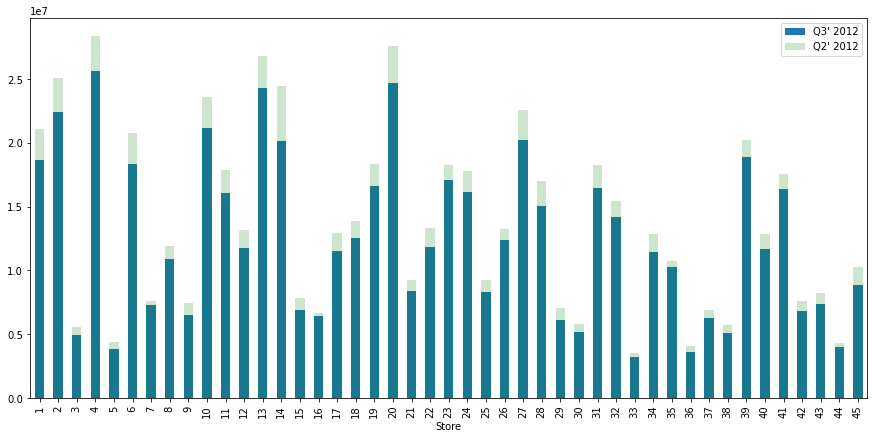

In [16]:
# Sales for second and third quarter in 2012
quarter_2_sales = walmart_data[(walmart_data['Date'] >= '2012-04-01') & (walmart_data['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales= walmart_data[(walmart_data['Date'] >= '2012-07-01') & (walmart_data['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
plt.figure(figsize=(15,7))
quarter_2_sales.plot(ax=quarter_3_sales.plot(kind ='bar'),kind='bar',color='g',alpha=0.2,legend=True)
plt.legend(["Q3' 2012", "Q2' 2012"])

In [17]:
#Calculating Growth rate in Q3'2012
quarter_2_sales= walmart_data[(walmart_data['Date'] >= '2012-04-01') & (walmart_data['Date'] <= '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
quarter_3_sales= walmart_data[(walmart_data['Date'] >= '2012-07-01') & (walmart_data['Date'] <= '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()
quarterly_growth_rate = ((quarter_3_sales - quarter_2_sales )/quarter_2_sales)*100
quarterly_growth_rate.sort_values(ascending=False).head()

Store
16   -2.789294
7    -3.824738
35   -4.663086
26   -6.057624
39   -6.396875
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Store'>

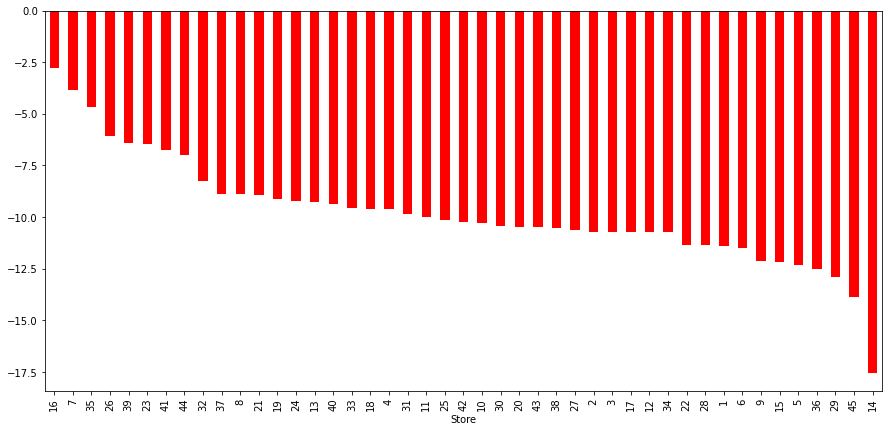

In [18]:
plt.figure(figsize=(15,7))
quarterly_growth_rate.sort_values(ascending=False).plot(kind='bar', color='red')

In [19]:
#4) Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [20]:
#Defining holiday dates
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [21]:
#Calculating mean sales on holidays : 
Super_Bowl_Sales = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Labour_Day_Sales = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Labour_Day)]))['Weekly_Sales'].mean()
Thanksgiving_Sales = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Thanksgiving)]))['Weekly_Sales'].mean()
Christmas_Sales = (pd.DataFrame(walmart_data.loc[walmart_data.Date.isin(Christmas)]))['Weekly_Sales'].mean()
Super_Bowl_Sales,Labour_Day_Sales,Thanksgiving_Sales,Christmas_Sales

(1079127.9877037033, 1042427.2939259257, 1471273.427777778, 960833.1115555551)

In [22]:
#Calculating mean sales on non-holidays :
Non_Holiday_Sales = walmart_data[walmart_data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()
Non_Holiday_Sales

1041256.3802088564

In [23]:
Mean_Sales = {'Super_Bowl_Sales' : Super_Bowl_Sales,
              'Labour_Day_Sales': Labour_Day_Sales,
              'Thanksgiving_Sales':Thanksgiving_Sales,
              'Christmas_Sales': Christmas_Sales,
              'Non_Holiday_Sales': Non_Holiday_Sales}

In [24]:
Mean_Sales 

{'Super_Bowl_Sales': 1079127.9877037033,
 'Labour_Day_Sales': 1042427.2939259257,
 'Thanksgiving_Sales': 1471273.427777778,
 'Christmas_Sales': 960833.1115555551,
 'Non_Holiday_Sales': 1041256.3802088564}

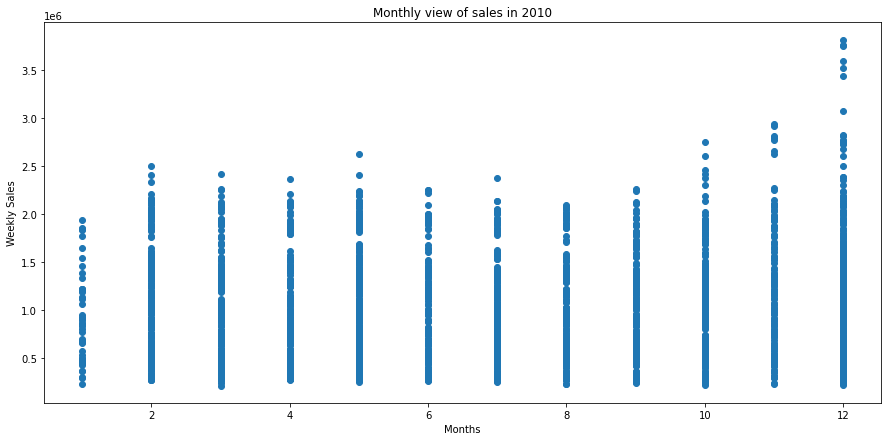

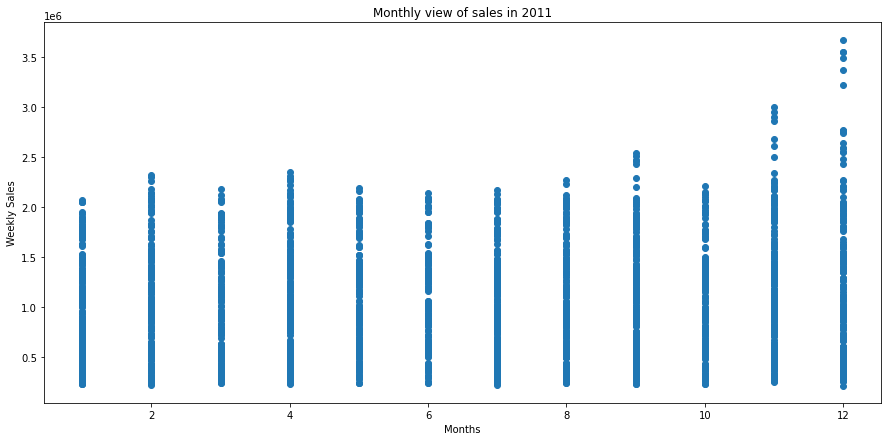

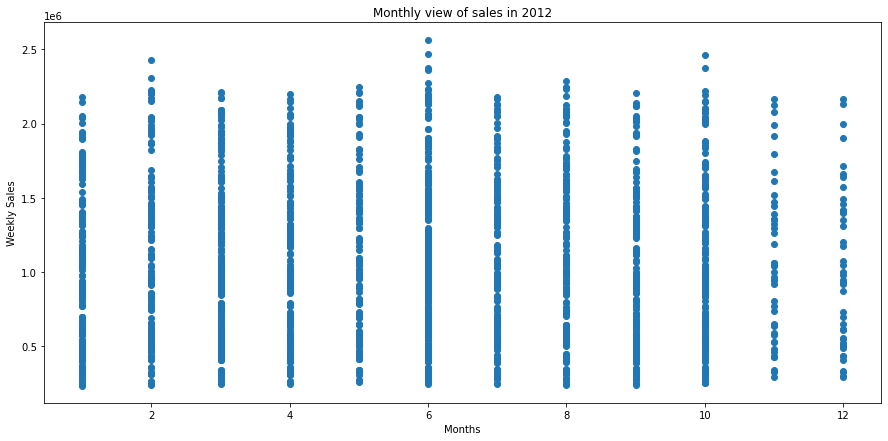

In [25]:
#5) Provide a monthly and semester view of sales in units and give insights.
#Year-wise Monthly Sales

plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2010]["Month"],walmart_data[walmart_data.Year==2010]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2011]["Month"],walmart_data[walmart_data.Year==2011]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.figure(figsize=(15,7))
plt.scatter(walmart_data[walmart_data.Year==2012]["Month"],walmart_data[walmart_data.Year==2012]["Weekly_Sales"])
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()


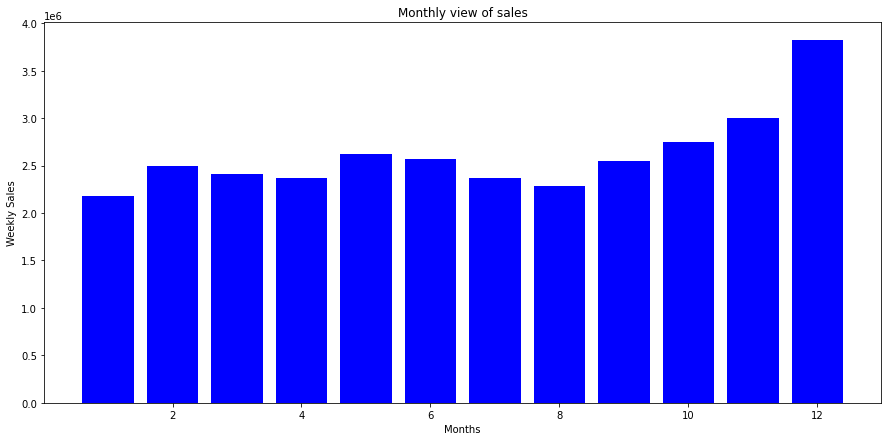

In [37]:
#Overall Monthly Sales
plt.figure(figsize=(15,7))
plt.bar(walmart_data["Month"],walmart_data["Weekly_Sales"], color='blue')
plt.xlabel("Months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")
plt.show()

<Figure size 1080x504 with 0 Axes>

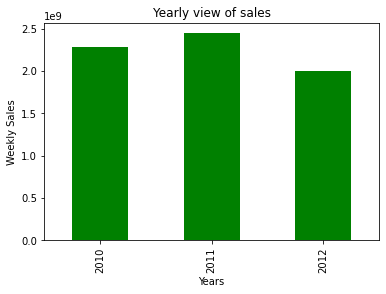

In [34]:
#Yearly Sales
plt.figure(figsize=(15,7))
walmart_data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False, color='green')
plt.xlabel("Years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales")
plt.show()

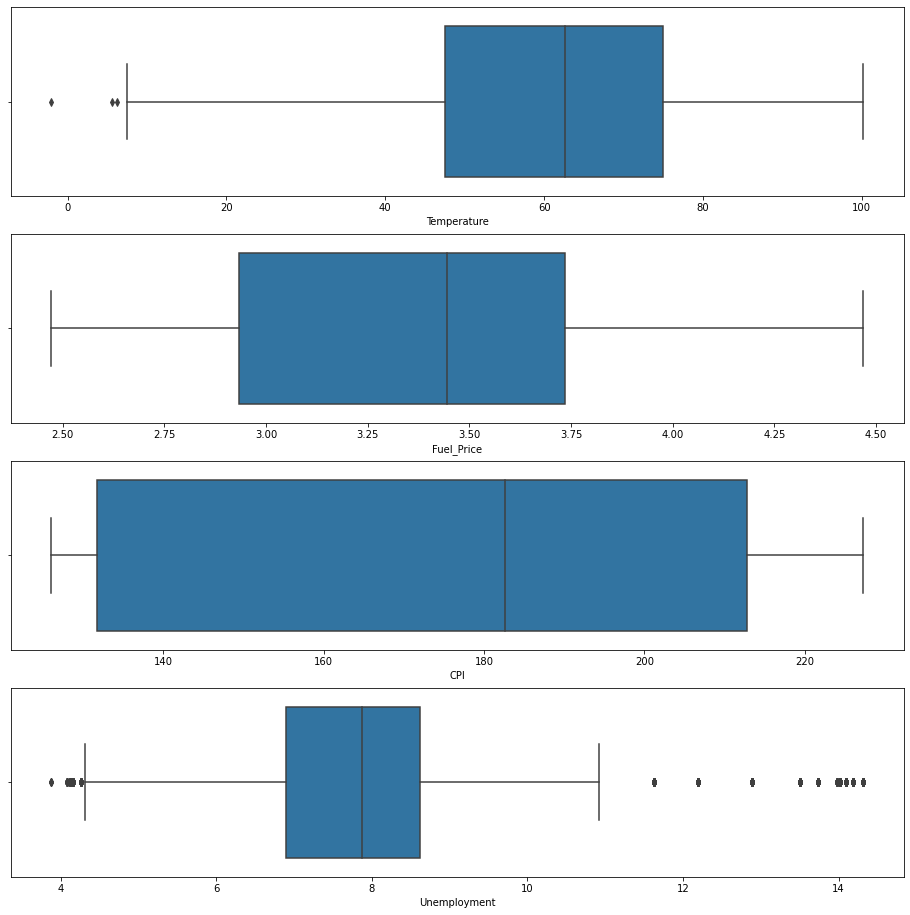

In [28]:
#Detecting outliers :
fig, axis = plt.subplots(4,figsize=(16,16))
X = walmart_data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(walmart_data[column],ax=axis[i])
    
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Dropping outliers     
walmart_data_clean = walmart_data[(walmart_data['Unemployment']<10) & (walmart_data['Unemployment']>4.5) & (walmart_data['Temperature']>10)]
walmart_data_clean

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


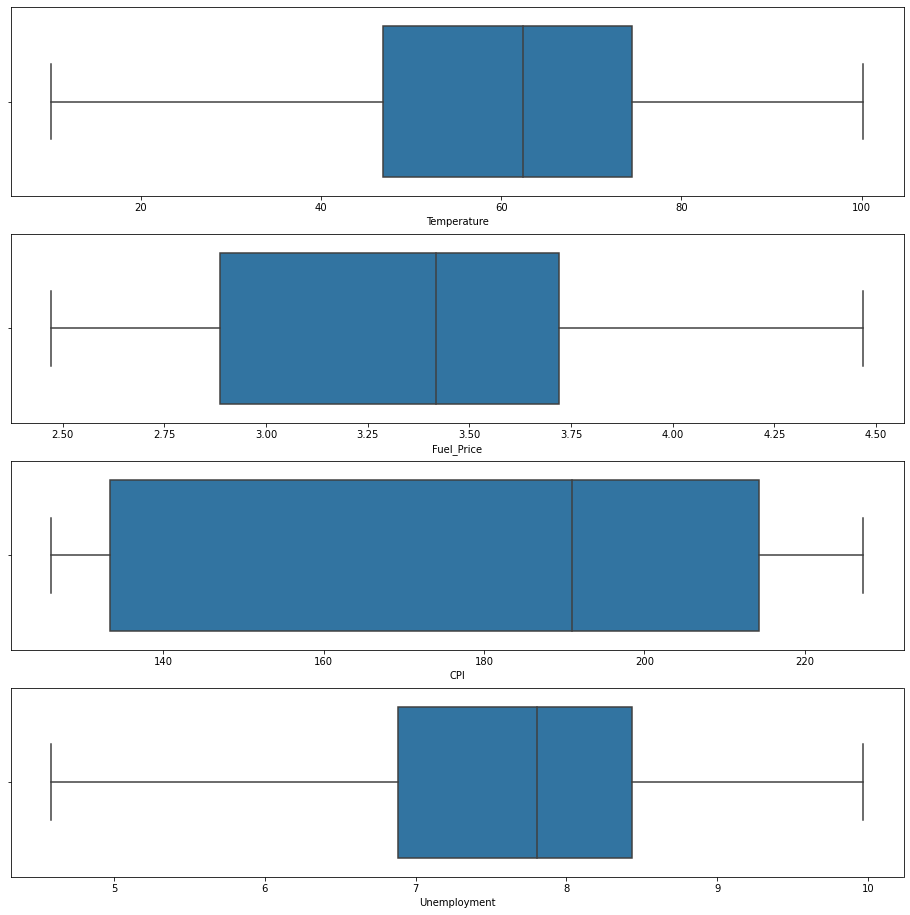

In [30]:
#Checking data for outliers
fig, axis = plt.subplots(4,figsize=(16,16))
X = walmart_data_clean[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(walmart_data_clean[column], ax=axis[i])

import warnings
warnings.filterwarnings('ignore')

In [31]:
# Linear Regression :
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
X = walmart_data_clean[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
Y = walmart_data_clean['Weekly_Sales']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

Linear Regression:

Accuracy: 12.912495465283225
Mean Absolute Error: 447699.1934558603
Mean Squared Error: 290428546982.4188
Root Mean Squared Error: 538914.2297086047


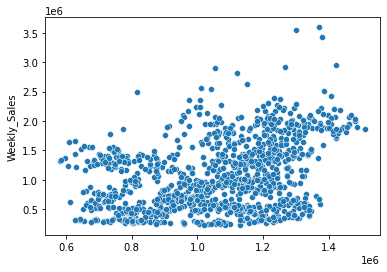

In [32]:
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, Y_train)
Y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, Y_train)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)

import warnings
warnings.filterwarnings('ignore')

Random Forest Regressor:

Accuracy: 94.44989146877877
Mean Absolute Error: 67619.70886448765
Mean Squared Error: 18498254603.55974
Root Mean Squared Error: 136008.28873109072


<AxesSubplot:ylabel='Weekly_Sales'>

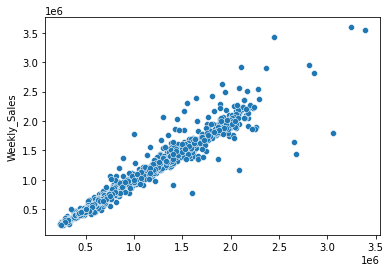

In [33]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor()        
rfr.fit(X_train,Y_train)
Y_pred = rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, Y_test)*100)
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred)))
sns.scatterplot(Y_pred, Y_test)